In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import requests
url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy'

In [3]:
myfile = requests.get(url,stream = True)
total_length = int(myfile.headers.get('content-length'))

In [4]:
from IPython.display import clear_output
dl = 0
done = 0
with open('camel_protec.npy','wb') as f:    
    for data in myfile.iter_content(chunk_size=4096):
        dl += len(data)
        f.write(data)
        done = int(50 * dl / total_length)
        clear_output()
        print("\r[%s%s]" % ('=' * done, ' ' * (50-done)) )

[==================================================]


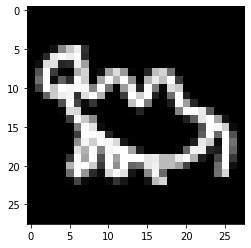

In [6]:
#Load data
import numpy as np
X = np.load('camel.npy')
X = X.reshape((-1,28,28,1))
import matplotlib.pyplot as plt

plt.imshow(X[0].squeeze(),cmap = 'gray')

In [7]:
from keras.preprocessing.image import ImageDataGenerator
def fun(x):
  return (x/255.0 - 0.5)
x_gen = ImageDataGenerator(preprocessing_function=fun)
xx_gen = x_gen.flow(X,batch_size = 64)

Using TensorFlow backend.


In [39]:
from models.DCGAN import GAN
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

%matplotlib inline

[autoreload of models.DCGAN failed: Traceback (most recent call last):
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\I

In [52]:
gan = GAN(
    input_dim=(28,28,1),
                
                discriminator_conv_filter=[64,64,128,128],
                discriminator_conv_kernel_size=[5,5,5,5],
                discriminator_conv_stride=[2,2,2,1],
                disctriminator_activation_function='relu',
                discriminator_learning_rate=0.0008,
                discriminator_batch_norm_momentum = None,
                discriminator_dropout_rate=0.4,

                generator_initial_dense_layer_size=(7,7,64),
                generator_upsample=[2,2,1,1],
                generator_conv_filter=[128,64,64,1],
                generator_conv_kernel_size=[5,5,5,5],
                generator_conv_strides=[1,1,1,1],
                generator_batch_norm_momentum = 0.9,
                genrator_activation = 'relu',
                genrator_dropout_rate=None,
                generator_learning_rate=0.0004,
                optimiser = 'rmsprop',
                zdim=100
)

[autoreload of models.DCGAN failed: Traceback (most recent call last):
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\I

input dim (28, 28, 1)


In [49]:

gan.discriminator.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
Discriminator_conv_layer_1 ( (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_88 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
Discriminator_conv_layer_2 ( (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_89 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 7, 7, 64)          0  

In [27]:

gan.generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 3136)              316736    
_________________________________________________________________
batch_normalization_16 (Batc (None, 3136)              12544     
_________________________________________________________________
activation_47 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_cov_0 (Conv2D)     (None, 14, 14, 128)       20

In [29]:
gan.model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
generator (Model)            (None, 28, 28, 1)         844161    
_________________________________________________________________
model_6 (Model)              (None, 1)                 720833    
Total params: 844,161
Trainable params: 837,377
Non-trainable params: 6,784
_________________________________________________________________


d:\envs\DavidFoster\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [37]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 50

In [ ]:
gan.train(     
    xx_gen
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = 'RUN'
    , using_generator = True
    , print_every_n_batch = PRINT_EVERY_N_BATCHES
)

[autoreload of models.DCGAN failed: Traceback (most recent call last):
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "d:\envs\DavidFoster\lib\site-packages\I

0 ,[D Loss=0.701,0.701,0.702] [D acc = 0.258,0.188,0.328] [G loss = 0.763} G acc = 0.039}]
0 ,[D Loss=0.691,0.708,0.674] [D acc = 0.453,0.047,0.859] [G loss = 0.792} G acc = 0.000}]
1 ,[D Loss=0.680,0.709,0.651] [D acc = 0.523,0.094,0.953] [G loss = 0.888} G acc = 0.000}]


In [43]:
next(xx_gen).shape

(64, 28, 28, 1)